In [1]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science\Time series

22-04-2024  11:22    <DIR>          .
17-04-2024  13:07    <DIR>          ..
22-04-2024  11:21    <DIR>          .ipynb_checkpoints
19-04-2024  12:15            55,852 daily-minimum-temperatures-in-me.csv
17-04-2024  12:18            55,837 daily-minimum-temperatures-in-me.csv.xls
19-04-2024  14:41            78,199 DailyDelhiClimateTrain.csv
19-04-2024  12:19           590,808 Data Preperation.ipynb
19-04-2024  12:15             7,318 Electric_Production.csv
19-04-2024  12:15             6,903 monthly-beer-production-in-austr.csv
19-04-2024  14:48           184,699 ploting time series.ipynb
22-04-2024  11:21                72 Resampling and Interpolation.ipynb
19-04-2024  12:15               509 sales-of-shampoo-over-a-three-ye.csv
22-04-2024  11:20               519 shampoo.csv.xls
18-04-2024  12:12            32,954 Time_Series_Forecasting.ipynb
              11 File(s)      

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

In [17]:
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')
    

In [18]:
df = pd.read_csv("shampoo.csv.xls",header=0,index_col=[0],parse_dates=True,date_parser=parser).squeeze()

In [19]:
df

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [22]:
upsampled = df.resample('D').mean()

In [24]:
upsampled

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
              ...  
1903-11-27      NaN
1903-11-28      NaN
1903-11-29      NaN
1903-11-30      NaN
1903-12-01    646.9
Freq: D, Name: Sales, Length: 1065, dtype: float64

In [25]:
len(upsampled)

1065

In [27]:
interpolated = upsampled.interpolate(method='linear')
interpolated

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
                 ...    
1903-11-27    638.153333
1903-11-28    640.340000
1903-11-29    642.526667
1903-11-30    644.713333
1903-12-01    646.900000
Freq: D, Name: Sales, Length: 1065, dtype: float64

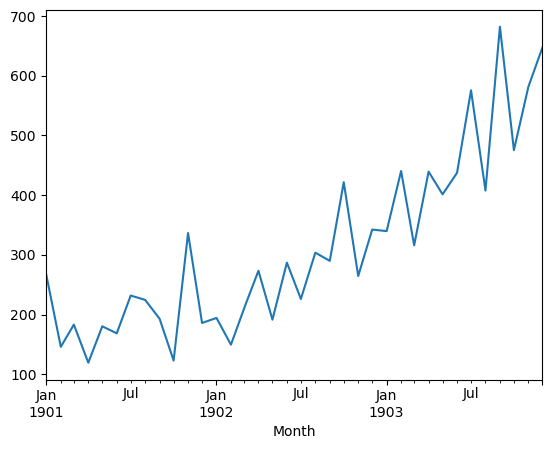

In [29]:
interpolated.plot()
plt.show()

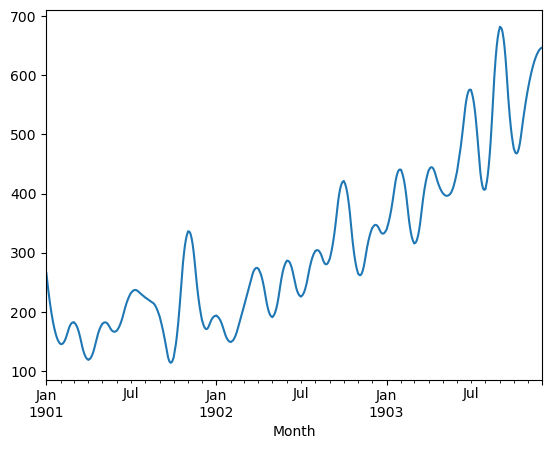

In [31]:
interpolated = upsampled.interpolate(method='spline',order=2)
interpolated.plot()
plt.show()

### Down Sampling

In [32]:
df

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
1902-06-30    250.566667
1902-09-30    273.166667
1902-12-31    342.800000
1903-03-31    365.333333
1903-06-30    426.000000
1903-09-30    555.033333
1903-12-31    567.833333
Freq: Q-DEC, Name: Sales, dtype: float64


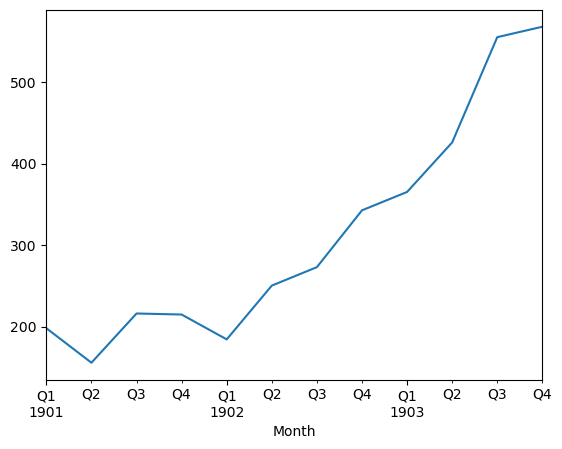

In [34]:
resample = df.resample("Q")
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales)
quarterly_mean_sales.plot()
plt.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


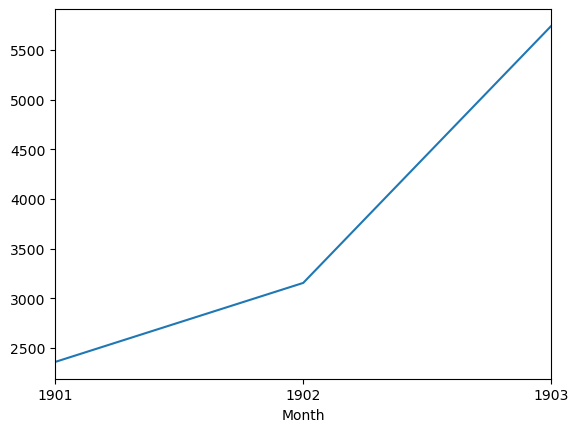

In [35]:
resample = df.resample('A')
annual_sum_of_sales = resample.sum()
print(annual_sum_of_sales)
annual_sum_of_sales.plot()
plt.show()